In [286]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [287]:
wine= pd.read_csv('wine.csv')
wine.describe()


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [288]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [289]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [290]:
  # considering only numerical data
wine.data = wine.iloc[:,1:]
  wine.data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [291]:
##normalisisng the numerical data
wine_normal=scale(wine.data)
wine_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [292]:
###we can even se how many  number of the pca we need
pca = PCA(n_components=13)
pca_values = pca.fit_transform(wine_normal)

In [293]:
####the amount of variance that each PCA explains is:
var= pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [294]:
###cumulative variance
cum_var=np.cumsum(np.round(var,decimals=4)*100)
cum_var

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

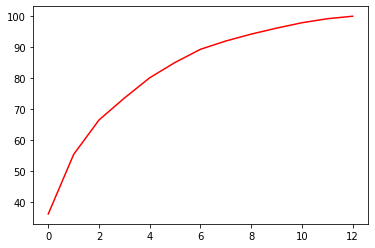

In [295]:
##variance plot for the PCA components obtained:
plt.plot(cum_var, color="red")

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


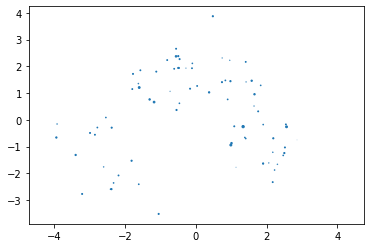

In [296]:
##plot between the PCA 1 na d PCA2 
x=pca_values[:,0:1]
y=pca_values[:,1:2]
z=pca_values[:,2:3]
plt.scatter(x,y,z)

In [297]:
finalDF=pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']),wine[['Type']]], axis=1)

In [298]:
finalDF

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


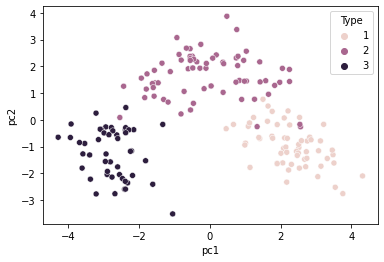

In [299]:
import seaborn as sns
sns.scatterplot(data=finalDF,x='pc1',y='pc2',hue='Type')

# *** Hierarichal Clustering for PCA***

In [300]:
#IMPRT HIERARCHICAL CLUSTERING LIBRARIES
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# **COMPLETE LINKAGE METHOD for PCA**

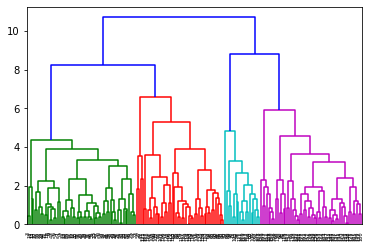

In [301]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(finalDF, method='complete'))

In [302]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [303]:
# save clusters for chart
y_hc = hc.fit_predict(finalDF)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [304]:
Clusters

,Clusters
0,3
1,3
2,3
3,3
4,4
...,...
173,0
174,0
175,0
176,0


In [305]:
finalDF['h_clusterid'] = Clusters

In [306]:
finalDF

,pc1,pc2,pc3,Type,h_clusterid
0,3.316751,-1.443463,-0.165739,1,3
1,2.209465,0.333393,-2.026457,1,3
2,2.516740,-1.031151,0.982819,1,3
3,3.757066,-2.756372,-0.176192,1,3
4,1.008908,-0.869831,2.026688,1,4
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,0
174,-2.601956,-1.757229,0.207581,3,0
175,-2.677839,-2.760899,-0.940942,3,0
176,-2.387017,-2.297347,-0.550696,3,0


In [308]:
finalDF.iloc[:,0:3].groupby(finalDF.h_clusterid).mean()

,pc1,pc2,pc3
h_clusterid,,,
0,-2.641654,-1.017061,-0.266749
1,-0.073410,1.638355,0.871832
2,0.246418,2.224177,-1.219950
3,2.331491,-0.956264,-0.249528
4,1.474384,-0.581008,3.641845


In [252]:
#No infrences can be derived from the dendrogram.. We can go for Kmean Clustering for large data sets.

# ***Kmeans for PCA***

In [309]:
from sklearn.cluster import KMeans

In [310]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

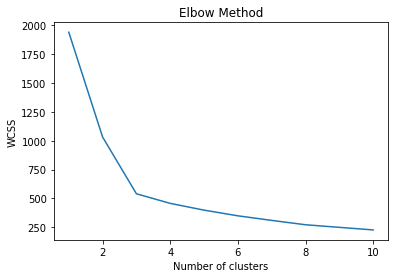

In [311]:
wcss = []    # variable for storing total within sum of squares for each kmeans 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(finalDF)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [256]:
###WE HAVE CHOSEN THE BEST K VALUE IS 3. AND WE ARE GOING WITH IT

In [312]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(finalDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [313]:
clusters_new.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

# **THESE ARE THE CLUSTER MEMBERS, THAT WE ARE GOING TO APPEND IT IN THE UNIVERSITY DATASET**

In [314]:
#Assign clusters to the data set
finalDF['k_cluster'] = clusters_new.labels_

In [315]:
finalDF

,pc1,pc2,pc3,Type,h_clusterid,k_cluster
0,3.316751,-1.443463,-0.165739,1,3,0
1,2.209465,0.333393,-2.026457,1,3,0
2,2.516740,-1.031151,0.982819,1,3,0
3,3.757066,-2.756372,-0.176192,1,3,0
4,1.008908,-0.869831,2.026688,1,4,0
...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,0,1
174,-2.601956,-1.757229,0.207581,3,0,1
175,-2.677839,-2.760899,-0.940942,3,0,1
176,-2.387017,-2.297347,-0.550696,3,0,1


In [316]:
# ### Grouping Data for predictions further 
result=finalDF.groupby(finalDF.k_cluster).mean()

In [317]:
result

,pc1,pc2,pc3,Type,h_clusterid
k_cluster,,,,,
0,2.276194,-0.932054,0.001528,1.048387,3.064516
1,-2.720036,-1.125651,-0.239093,2.941176,0.000000
2,-0.036957,1.772239,0.186139,2.000000,1.246154


HIERARCHICAL CLUSTERING FOR ORIGINAL DATASET

## **COMPLETE LINKAGE METHOD for original data set**

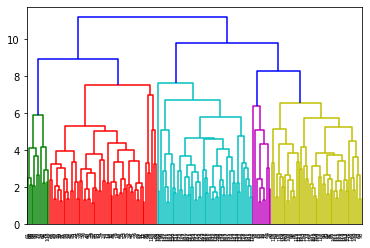

In [263]:
# create dendrogram
dendrogram2 = sch.dendrogram(sch.linkage(wine_normal, method='complete'))

In [264]:
# create clusters
hc2 = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')

In [265]:
# save clusters for chart
y_hc2 = hc2.fit_predict(wine_normal)
Clusters2=pd.DataFrame(y_hc2,columns=['Clusters'])

In [266]:
Clusters2

,Clusters
0,0
1,0
2,0
3,0
4,4
...,...
173,1
174,1
175,1
176,1


In [267]:
wine['h_clusterid'] = Clusters2

In [268]:
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [269]:
wine.iloc[:,1:].groupby(wine.h_clusterid).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid
h_clusterid,,,,,,,,,,,,,,
0,13.604211,1.982807,2.360526,16.652632,106.368421,2.797719,2.920175,0.274386,2.015088,5.326667,1.051579,3.141228,1073.052632,0
1,13.085510,3.389388,2.422041,21.234694,99.571429,1.633878,0.794490,0.441020,1.110000,6.958571,0.696327,1.703265,621.775510,1
2,12.210000,2.008750,2.291250,20.981250,88.375000,2.317292,2.175417,0.363542,1.662917,2.848125,1.038333,2.958333,479.083333,2
3,12.465000,1.500833,2.045833,17.341667,98.500000,1.913333,1.475833,0.402500,0.967500,3.395000,1.155500,2.156667,565.000000,3
4,13.400000,1.899000,2.814000,21.770000,120.100000,2.941000,3.129000,0.383000,1.751000,5.355000,1.152000,3.075000,1026.000000,4
5,13.910000,1.675000,2.670000,23.750000,93.500000,2.700000,1.205000,0.525000,2.495000,12.375000,0.570000,1.870000,640.000000,5


# **Kmeans for original data set**

In [270]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_wine_df = scaler.fit_transform(wine.iloc[:,1:])

In [271]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

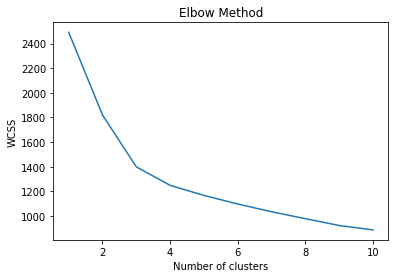

In [272]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_wine_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# ***WE HAVE CHOSEN THE BEST K VALUE IS 5. AND WE ARE GOING WITH IT***

In [273]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_wine_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [274]:
clusters_new.labels_

array([4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 1, 0, 0, 1, 1, 0, 4,
       1, 1, 0, 4, 0, 1, 0, 2, 1, 0, 1, 0, 4, 0, 1, 1, 0, 3, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 3, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

# ***THESE ARE THE CLUSTER MEMBERS, THAT WE ARE GOING TO APPEND IT IN THE UNIVERSITY DATASET***

In [275]:
#Assign clusters to the data set
wine['clust4'] = clusters_new.labels_

In [ ]:
wine

In [277]:
wine.iloc[:,1:].groupby(wine.clust4).mean()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,h_clusterid,clust4
clust4,,,,,,,,,,,,,,,
0,12.176207,1.940345,2.385517,21.531034,93.448276,1.947241,1.723103,0.453448,1.359310,2.890690,1.083310,2.540000,508.413793,2.241379,0
1,12.321471,1.912647,2.106176,19.023529,89.205882,2.514118,2.320882,0.287353,1.747941,3.068235,1.032647,3.013824,491.794118,2.000000,1
2,13.485455,1.879091,2.803636,22.063636,118.090909,2.928182,2.963636,0.396364,1.837273,6.050000,1.099091,2.973636,992.727273,4.090909,2
3,13.119592,3.380204,2.420000,21.255102,98.653061,1.654286,0.796735,0.448776,1.124898,7.147347,0.688571,1.693469,621.673469,1.081633,3
4,13.652182,1.968545,2.382364,16.630909,106.872727,2.787455,2.921636,0.275273,1.981818,5.371273,1.055818,3.146545,1092.727273,0.000000,4


# **when we compared the pca with original data sets, we have got 3 clusters for PCA, hwereas the origina dataset have got 5 clusters. the optimum no of clusters are obtained by doung PCA.**